# MITBIH Dataset Creation
In this notebook, we create TS for the TSSB from the BIHARR data archive. Annotation codes are available at: https://www.physionet.org/physiotools/wpg/wpg_32.htm

In [1]:
import matplotlib

matplotlib.rcParams['pdf.fonttype'] = 42
matplotlib.rcParams['ps.fonttype'] = 42

In [2]:
import numpy as np
import pandas as pd
import daproli as dp

import pandas as pd
pd.set_option('display.max_rows', None)

import matplotlib.pyplot as plt
import seaborn as sns

sns.set_theme()
sns.set_color_codes()

import Orange
import sys
import wfdb
sys.path.append("../")

from scipy import signal
from tqdm import tqdm
from src.visualizer import plot_ts

First, we need to download the PhysioNet record and annotation from https://physionet.org/content/mitdb/1.0.0/.

In [3]:
subject = 2

In [4]:
rec = wfdb.rdrecord(f"{100+subject}", pn_dir='mitdb')

In [5]:
ann = wfdb.rdann(f"{100+subject}", "atr", pn_dir='mitdb')

In [84]:
signal = 1
name = f"BIHARR_ECG_{rec.sig_name[signal]}_Subject{subject}"
ts = rec.p_signal[:,signal]
cps = np.array(ann.sample)[np.array(ann.symbol) == "+"]

# ignore first CPs as it marks the beginning 
cps = cps[1:]

Let's visualise the TS.

<Figure size 432x288 with 0 Axes>

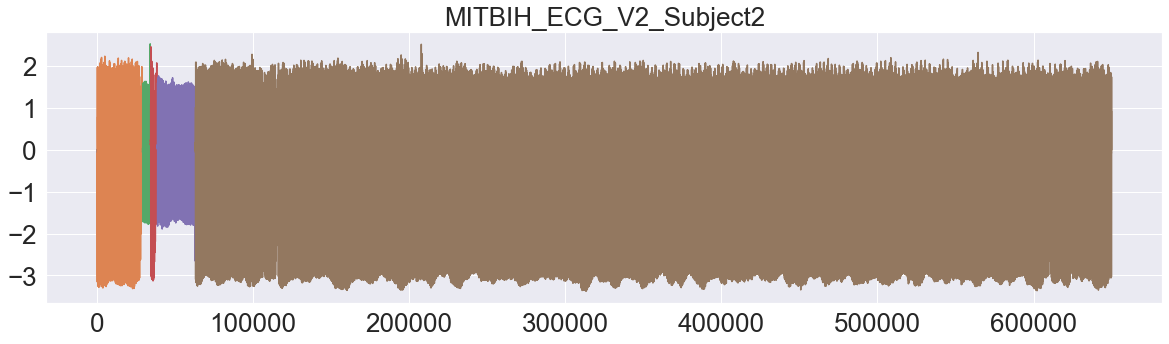

In [85]:
plot_ts(
    name,
    ts,
    cps,
    show=True
)

Finally, let's save the TS and display the annotated CPs.

In [86]:
print(f"{name},360,{','.join(dp.map(str, cps))}")
np.savetxt(f"../datasets/VLTS/{name}.txt", ts)

MITBIH_ECG_V2_Subject2,360,68,29133,34216,38682,62969
